In [2]:
import pyttsx3

engine = pyttsx3.init()
engine.save_to_file("who are you", '../temp/hello.wav')
engine.runAndWait()


In [4]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 16000  # Sample rate
seconds = 3  # Duration

print("Recording...")
recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()
write("output.wav", fs, recording)
print("Saved as output.wav")


Recording...
Saved as output.wav


In [17]:
file_path = 'C:/Users/ADMIN/Desktop/clean_data/data_draw/audio_files_wav/abhorrence.wav'

In [16]:
# thêm  Gaussian noise
import numpy as np

def add_gaussian_noise(audio, noise_level=0.005):
    noise = np.random.normal(0, noise_level, size=audio.shape)
    return audio + noise

In [18]:
#  lấy khoảng các vùng có âm thanh
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/voice-activity-detection", 
                                    use_auth_token="")

# process audio file
output = pipeline(file_path)

Lightning automatically upgraded your loaded checkpoint from v1.1.3 to v2.5.1.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\ADMIN\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\059e96f964841d40f1a5e755bb7223f76666bba4\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.7.1, yours is 2.7.1+cpu. Bad things might happen unless you revert torch to 1.x.


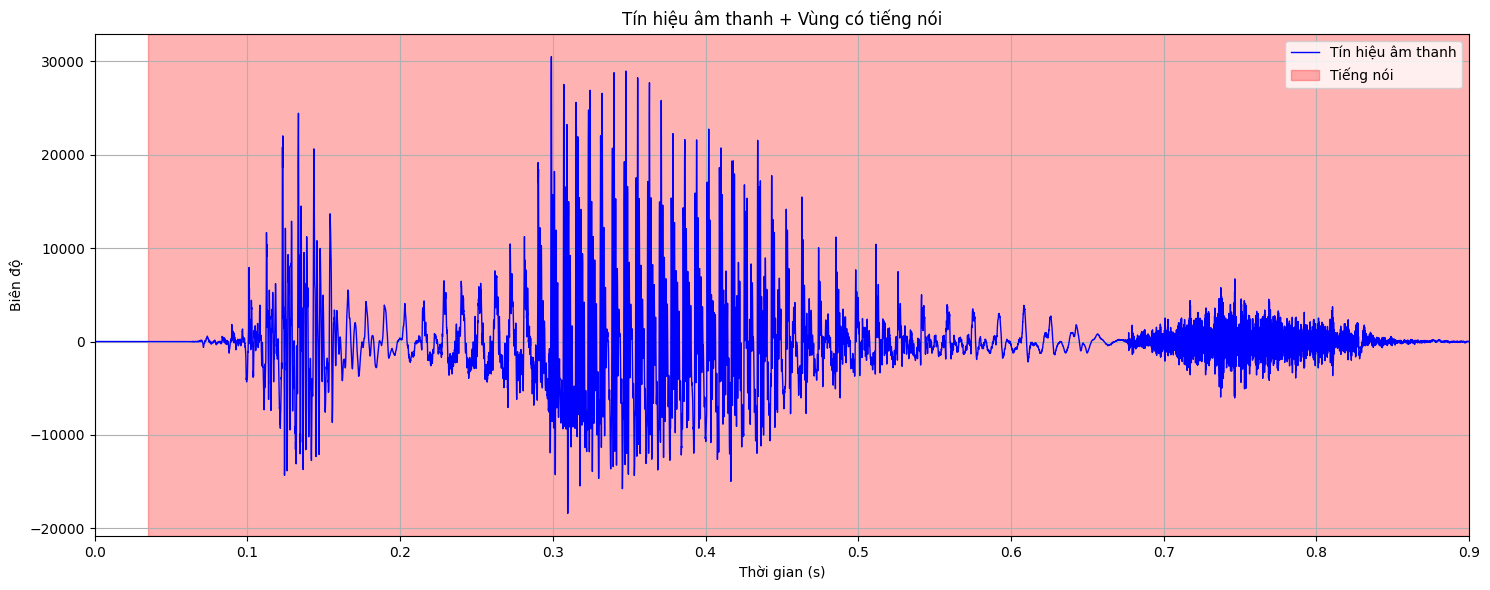

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pyannote.core import Segment
import noisereduce as nr



# Đọc tín hiệu âm thanh
sampling_rate, audio_signal = wavfile.read(file_path)

# Nếu stereo -> chuyển về mono
if len(audio_signal.shape) == 2:
    audio_signal = np.mean(audio_signal, axis=1)

# Tạo trục thời gian
audio_signal = add_gaussian_noise(audio_signal)
duration = len(audio_signal) / sampling_rate
time_axis = np.linspace(0, duration, num=len(audio_signal))

# Vẽ tín hiệu âm thanh
plt.figure(figsize=(15, 6))
plt.plot(time_axis, audio_signal, color='blue', linewidth=1, label='Tín hiệu âm thanh')

# === Đánh dấu các đoạn có tiếng nói ===
for speech_turn in output.get_timeline().support():
    plt.axvspan(speech_turn.start - 0.03, speech_turn.end, color='red', alpha=0.3, label='Tiếng nói')

# Đặt tiêu đề và nhãn
plt.title(f'Tín hiệu âm thanh + Vùng có tiếng nói')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.xlim(0, duration)

# Đảm bảo không trùng nhãn trong chú thích
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()


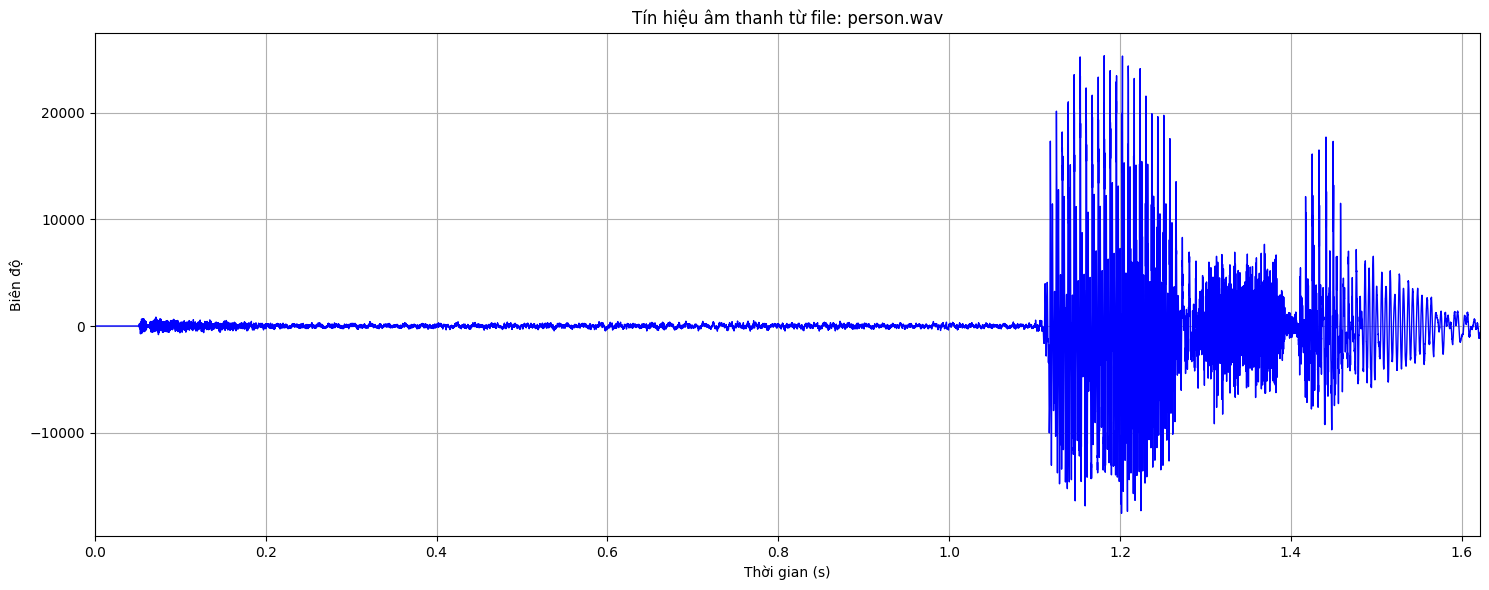

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Đường dẫn đến file âm thanh
file_path = './person.wav'  # Thay đổi đường dẫn tới file âm thanh mà bạn muốn đọc

# Bước 1: Đọc tín hiệu âm thanh
sampling_rate, audio_signal = wavfile.read(file_path)

# Nếu tín hiệu là stereo, chuyển thành mono bằng cách lấy trung bình hai kênh
if len(audio_signal.shape) == 2:
    audio_signal = np.mean(audio_signal, axis=1)

# Bước 2: Tạo trục thời gian
duration = len(audio_signal) / sampling_rate  # Thời gian tổng của tín hiệu
time_axis = np.linspace(0, duration, num=len(audio_signal))  # Tạo trục thời gian

# Tăng độ phân giải cho đồ thị
plt.figure(figsize=(15, 6))  # Tạo kích thước đồ thị lớn hơn cho độ phân giải cao hơn

# Bước 3: Vẽ tín hiệu trên miền thời gian
plt.plot(time_axis, audio_signal, color='blue', linewidth=1)  # Tăng độ dày đường vẽ
plt.title(f'Tín hiệu âm thanh từ file: {file_path.split("/")[-1]}')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.xlim(0, duration)  # Đặt giới hạn trục x từ 0 đến thời gian tổng

# Hiển thị đồ thị
plt.tight_layout()  # Để các đồ thị không bị chồng chéo
plt.show() 


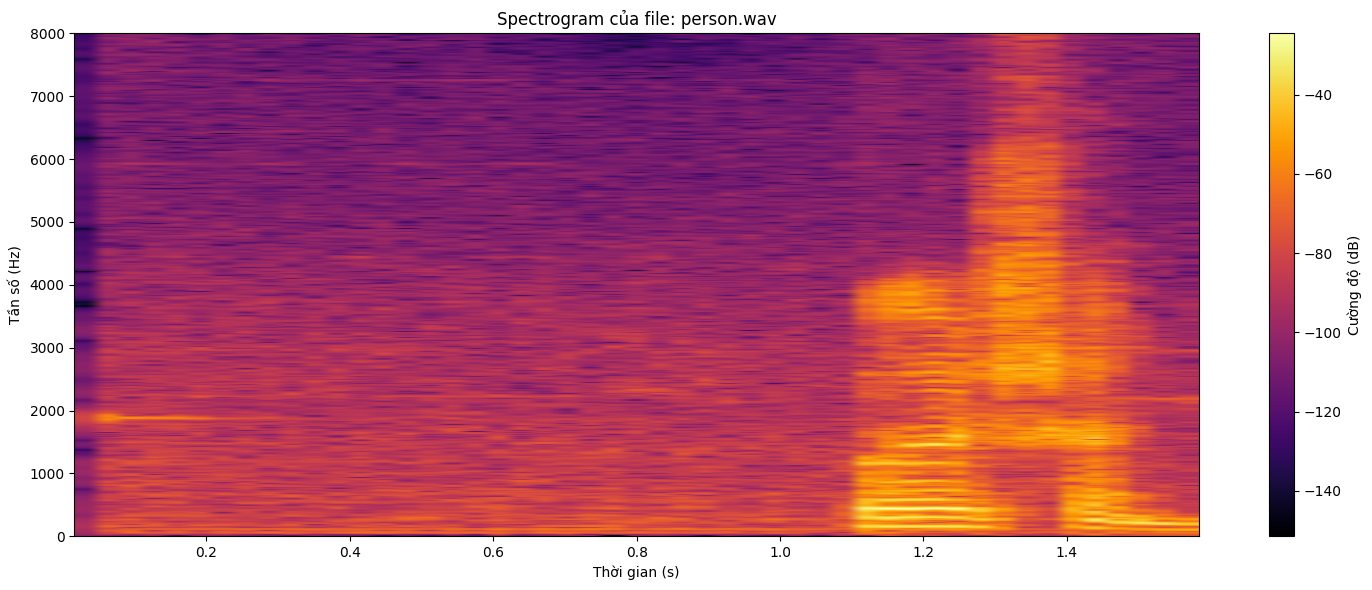

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Đọc file WAV
file_path = 'person.wav'
sampling_rate, audio_signal = wavfile.read(file_path)

# Nếu stereo → chuyển thành mono
if len(audio_signal.shape) == 2:
    audio_signal = np.mean(audio_signal, axis=1)

# Normal hóa biên độ nếu cần
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Vẽ spectrogram
plt.figure(figsize=(15, 6))
plt.specgram(audio_signal, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='inferno')

plt.title(f'Spectrogram của file: {file_path.split("/")[-1]}')
plt.xlabel('Thời gian (s)')
plt.ylabel('Tần số (Hz)')
plt.colorbar(label='Cường độ (dB)')
plt.tight_layout()
plt.show()


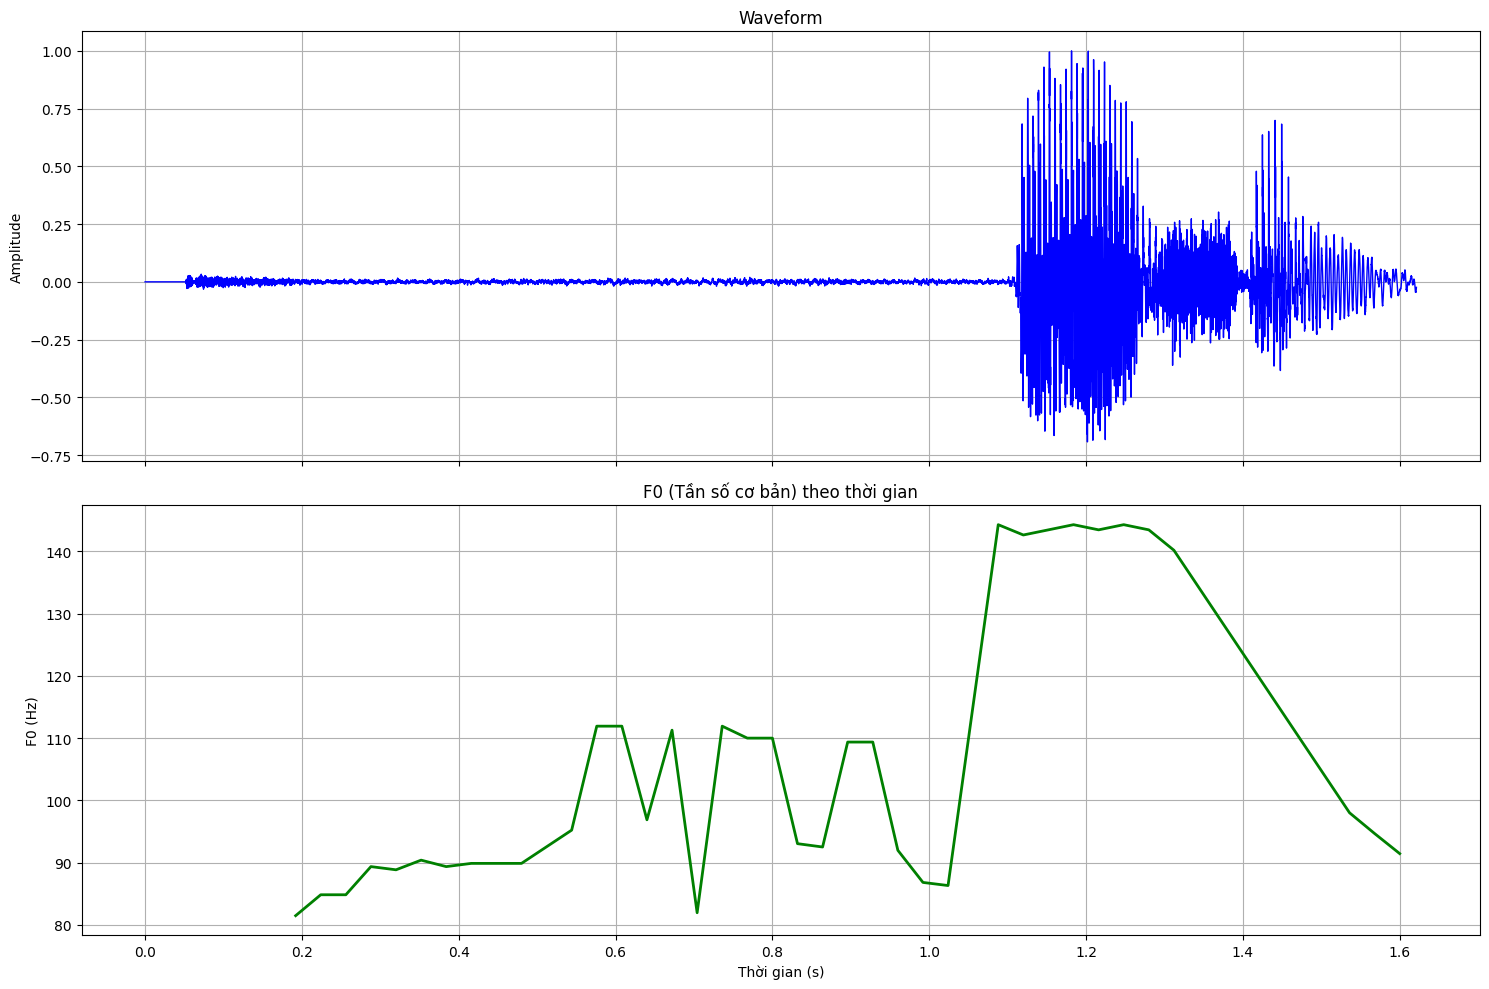

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display

# Đường dẫn đến file âm thanh
file_path = './person.wav'

# Đọc file WAV
sampling_rate, audio_signal = wavfile.read(file_path)

# Nếu stereo, chuyển thành mono
if len(audio_signal.shape) == 2:
    audio_signal = np.mean(audio_signal, axis=1)

# Chuẩn hóa tín hiệu
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Convert về float32 cho librosa
y = audio_signal.astype(np.float32)

# Tính F0 bằng pyin
f0, voiced_flag, voiced_prob = librosa.pyin(
    y,
    fmin=librosa.note_to_hz('C2'),
    fmax=librosa.note_to_hz('C7'),
    sr=sampling_rate
)

# Thời gian tương ứng với mỗi giá trị F0
times = librosa.times_like(f0, sr=sampling_rate)

# ----------------- VẼ ĐỒ THỊ -----------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Biểu đồ 1: Waveform
duration = len(y) / sampling_rate
time_axis = np.linspace(0, duration, num=len(y))
ax1.plot(time_axis, y, color='blue', linewidth=1)
ax1.set_title('Waveform')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Biểu đồ 2: F0 (chỉ vẽ những đoạn có tiếng - voiced)
ax2.plot(times[voiced_flag], f0[voiced_flag], color='green', linewidth=2)
ax2.set_title('F0 (Tần số cơ bản) theo thời gian')
ax2.set_xlabel('Thời gian (s)')
ax2.set_ylabel('F0 (Hz)')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [4]:
import librosa
import soundfile as sf
import noisereduce as nr
import numpy as np
from scipy import signal

def clean_audio_pipeline(input_path, output_path):
    # Đọc file
    audio, sr = librosa.load(input_path, sr=16000, mono=True)

    # Bước 1: Giảm tiếng ồn
    audio = nr.reduce_noise(y=audio, sr=sr, stationary=False, prop_decrease=0.8)

    # Bước 2: Cắt vùng im lặng
    audio, _ = librosa.effects.trim(audio, top_db=30)

    # Lưu file
    sf.write(output_path, audio, sr)
    return audio, sr

clean_audio_pipeline("output.wav", "cleaned_output.wav")

(array([ 1.5741962e-07, -9.6837422e-05, -8.3856758e-05, ...,
         1.2260255e-04,  1.1643611e-04,  1.2283241e-04],
       shape=(32768,), dtype=float32),
 16000)